<a href="https://colab.research.google.com/github/jceltruda/Projects-in-AI-and-ML/blob/main/ML_AI_Projects_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part 1


Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset/data

Task: Predict if an individual's salary is more or less than $50,000.

In [39]:
import numpy as np

 # Implementation
class NeuralNetwork:
    def __init__(self, layers, lr=0.1, a='sigmoid'):
        self.layers = layers # list of integers
        self.Len = len(layers) - 1
        self.learning_rate = lr
        self.activation = a

        self.weights = {}
        self.biases = {}

        for l in range(1, len(layers)):
            # Initialize weights randomly
            self.weights[str(l)] = np.random.randn(layers[l], layers[l-1]) * 0.01
            # Initialize biases
            self.biases[str(l)] = np.zeros((layers[l], 1))

    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    # Forward propagation
    def forward(self, X):

        A = X
        self.cache = {'A0': X} # Store input as A0
        # Iterate through layers
        for l in range(1, self.Len + 1):
            A_prev = A
            W = self.weights[str(l)]
            b = self.biases[str(l)]

            # Z = W * A_L-1 + b
            Z = np.dot(W, A_prev) + b

            # A = activation(Z)
            if self.activation == 'sigmoid':
                A = self._sigmoid(Z)

            # Store values for backpropagation
            self.cache['Z' + str(l)] = Z
            self.cache['A' + str(l)] = A

        return A

    # Cost function
    def cost(self, A, Y):
        # Cross-Entropy Loss
        cost = -(1/Y.shape[1]) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))
        return np.squeeze(cost)

    # Back propagation
    def backward(self, Y):
        m = Y.shape[1]

        grad_weights = {}
        grad_bias = {}

        A_final = self.cache['A' + str(self.Len)]

        # dZ for output layer
        dZ = A_final - Y

        # Calculate gradients for the last layer
        A_prev = self.cache['A' + str(self.Len - 1)]
        grad_weights[str(self.Len)] = (1/m) * np.dot(dZ, A_prev.T)
        grad_bias[str(self.Len)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        # Iterate through hidden layers
        for l in range(self.Len - 1, 0, -1):
            W_next = self.weights[str(l + 1)]

            # Calculate dZ for current layer
            dA = np.dot(W_next.T, dZ)

            if self.activation == 'sigmoid':
                A_current = self.cache['A' + str(l)]
                dZ = dA * (A_current * (1 - A_current))

            # Calculate gradients
            A_prev_loop = self.cache['A' + str(l - 1)]
            grad_weights[str(l)] = (1/m) * np.dot(dZ, A_prev_loop.T)
            grad_bias[str(l)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)

        return grad_weights, grad_bias

    # Train helper function
    def update_parameters(self, grad_weights, grad_bias):
        for l in range(1, self.Len + 1):
            self.weights[str(l)] -= self.learning_rate * grad_weights[str(l)]
            self.biases[str(l)] -= self.learning_rate * grad_bias[str(l)]

    # Train model
    def train(self, X, Y, epochs=1000):
        for i in range(epochs):
            # Forward propagation
            A_final = self.forward(X)

            # Compute cost
            loss = self.cost(A_final, Y)

            # Back propagation
            grad_weights, grad_bias = self.backward(Y)

            # Update parameters
            self.update_parameters(grad_weights, grad_bias)

            if i % 100 == 0:
                print(f"Cost after epoch {i}: {loss}")

    # Full and minibatch GD
    def train(self, X, Y, epochs=1000, batch_size=None):
        m = X.shape[1]

        # Default full GD
        if batch_size is None:
            batch_size = m

        for i in range(epochs):
            for j in range(0, m, batch_size):
                # Select batch for training
                begin = j
                end = min(j + batch_size, m)

                X_batch = X[:, begin:end]
                Y_batch = Y[:, begin:end]

                # Forward
                self.forward(X_batch)

                # Backward
                grad_weights, grad_bias = self.backward(Y_batch)

                # Update
                self.update_parameters(grad_weights, grad_bias)

            # Print update
            if i % 100 == 0:
                # Full dataset GD for updates
                A_full = self.forward(X)
                loss = self.cost(A_full, Y)
                print(f"Cost after epoch {i}: {loss}")

    # Make predictions
    def predict(self, X):
        A = self.forward(X)
        predictions = (A > 0.5).astype(int)
        return predictions

In [40]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'adult-income-dataset' dataset.
Path to dataset files: /kaggle/input/adult-income-dataset


In [45]:
import pandas as pd

df = pd.read_csv(path + "/adult.csv")
print(df.shape)
df.head()

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
from sklearn.model_selection import train_test_split

# Data preprocessing
df['income'] = df['income'].astype(str).str.strip()
df['target'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df = df.drop(columns=['income'])

cols = df.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df, columns=cols, drop_first=True)

# Create X and Y
X = df_processed.drop(columns=['target']).values.astype(float)
y = df_processed['target'].values.reshape(-1, 1).astype(float)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Match input shape
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T


# Define architecture
input_size = X_train.shape[0] # Num features
layer_dims = [input_size, 64, 32, 1] # 2 hidden layers

# Initialize network
nn = NeuralNetwork(layer_dims, lr=0.01, a='sigmoid')

# Training
print("Training:")
# Using Mini-batch GD
nn.train(X_train, y_train, epochs=500, batch_size=64)

print("Training Complete")
train_preds = nn.predict(X_train)
test_preds = nn.predict(X_test)

train_acc = np.mean(train_preds == y_train) * 100
test_acc = np.mean(test_preds == y_test) * 100

print(f"Train Accuracy: {train_acc:.2f}%")
print(f"Test Accuracy:  {test_acc:.2f}%")

Training:


/tmp/ipython-input-1137921569.py:21: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-Z))


Cost after epoch 0: 0.5519165163606742
Cost after epoch 100: 0.5519028107119178
Cost after epoch 200: 0.5518902401327408
Cost after epoch 300: 0.5518772774636893
Cost after epoch 400: 0.5518644891683222
Training Complete
Train Accuracy: 75.95%
Test Accuracy:  76.56%


This was a test execution of my model. It has demonstrated that the model works, and is likely suffering from underfitting as the test and training accuracy are both low. This could be partially due to the distribution of the dataset, far more people make <50k, the model may be biased towards this class.

Training was lengthy, so I implemented Minibatch gradient descent. This allowed training to go fatster since not all datapoints were used for each epoch, while still giving the model enough datapoints to learn from the data.

#Part 2

###Task 1

I will implement my model using PyTorch. I already had familiarity with PyTorch, below are resources I used and how I used them to expand/refresh knowledge.
* https://docs.pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
<br>This resource contained the base syntax knowledge and functions I needed to help implement the network, checking for a GPU, implementing forward propogation, etc. It was necessary to be able to define the actual model for implementation, without this knowledge I could not use the framework to create a model.

* https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
<br>This resource contained the syntax and implementation information for cross entropy loss. Since my dataset is imbalanced, I needed to understand how to penalize mispredictions of the target=1 class. This resource explained how I could use PyTorch to easily implement this.

* https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html
<br> This covered linear layer syntax. I needed this resource to be able to implement the connection between layers of my model.

###Task 2

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim

df = pd.read_csv(path + "/adult.csv")

# Data formatting
df['income'] = df['income'].astype(str).str.strip()
df['target'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df = df.drop(columns=['income'])
cols = df.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df, columns=cols, drop_first=True)

# Create X and y
X = df_processed.drop(columns=['target']).values.astype(float)
y = df_processed['target'].values.reshape(-1, 1).astype(float)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fit model
scaler = StandardScaler() # Standard data
#scaler = MinMaxScaler() # Normalized data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use PyTorch Tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

print(f"Train Shape: {X_train_tensor.shape}")
print(f"Test Shape:  {X_test_tensor.shape}")

Train Shape: torch.Size([39073, 100])
Test Shape:  torch.Size([9769, 100])


Data Shape: (48842, 101)
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week        target  
count  48842.000000    48842.000000  48842.000000  
mean      87.502314       40.422382      0.239282  
std      403.004552       12.391444      0.426649  
min        0.000000        1.000000      0.000000  
25%        0.000000       40.000000      0.000000  
50%        0.000000       40.000000      0.000000 

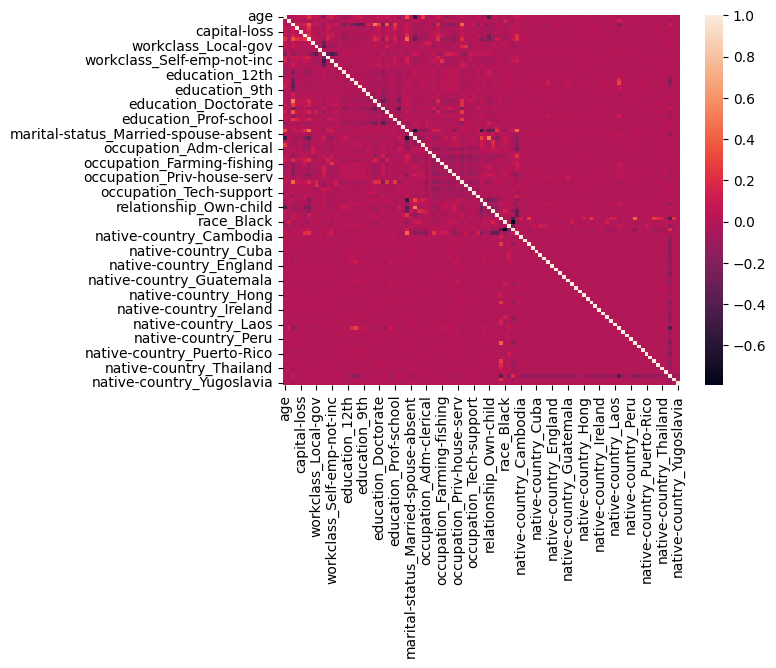

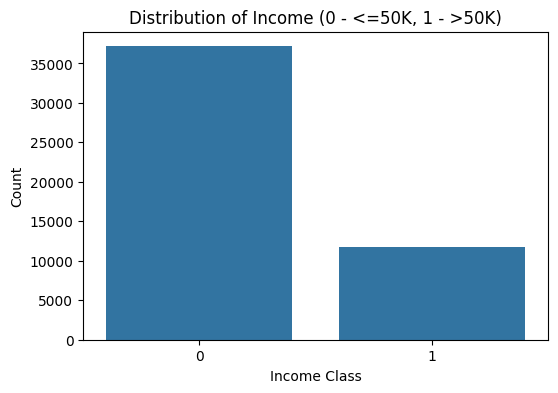


Class Proportions:
target
0    76.071823
1    23.928177
Name: proportion, dtype: float64


In [55]:
# EDA
print("Data Shape:", df_processed.shape)
print(df.describe())
# Visualize feature correlations
sns.heatmap(df_processed.corr(), annot=False)
plt.show()

# Visualize class distributions
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Income (0 - <=50K, 1 - >50K)')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

# Print class Ratios
print("\nClass Proportions:")
print(df['target'].value_counts(normalize=True) * 100)

In [56]:
# Penalize class 1 errors more due to fewer samples
neg_count = (y_train == 0).sum()
pos_count = (y_train == 1).sum()
pos_weight = neg_count / pos_count
class_weights = torch.tensor([1.0, pos_weight], dtype=torch.float32)
print(f"Positive Class Weight ratio: {pos_weight:.2f}")

# Loss function with class weights
criterion = nn.CrossEntropyLoss(weight=class_weights)

Positive Class Weight ratio: 3.16


In [57]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        # First layer
        self.layer1 = nn.Linear(input_size, hidden_size)
        # Activation function
        self.relu = nn.ReLU()
        # Second layer
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out

# Check for GPU
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

# Define model parameters
input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = 2
learning_rate = 0.1
num_epochs = 100

model = NeuralNetwork(input_dim, hidden_dim, output_dim)

Using cpu device


In [61]:
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

# Track losses
train_losses = []
dev_losses = []

# Convert for cross entropy loss
y_train_long = torch.LongTensor(y_train).squeeze()

for epoch in range(num_epochs):
    model.train()

    # Forward propagation
    outputs = model(X_train_tensor)

    # Calculate loss
    loss = criterion(outputs, y_train_long)

    # Back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    # Validation step
    model.eval()

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {loss.item():.4f}')

Epoch 10/100, Train Loss: 0.6155
Epoch 20/100, Train Loss: 0.4432
Epoch 30/100, Train Loss: 0.3797
Epoch 40/100, Train Loss: 0.3496
Epoch 50/100, Train Loss: 0.3354
Epoch 60/100, Train Loss: 0.3263
Epoch 70/100, Train Loss: 0.3198
Epoch 80/100, Train Loss: 0.3147
Epoch 90/100, Train Loss: 0.3107
Epoch 100/100, Train Loss: 0.3071


In [62]:
from sklearn.metrics import f1_score

# Test set evaluation
model.eval()
with torch.no_grad():
    # Forward pass
    test = model(X_test_tensor)

    # Get predicted class index
    _, predicted = torch.max(test.data, 1)
    y_test_labels = y_test_tensor.long().squeeze()

    # Calculate accuracy
    correct_predictions = (predicted == y_test_labels).sum().item()
    total_samples = y_test_labels.size(0)

    accuracy = correct_predictions / total_samples
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

    # Convert tensors to numpy for f1 score
    predicted_np = predicted.cpu().numpy()
    labels_np = y_test_labels.cpu().numpy()

    # Calculate F1 score
    f1 = f1_score(labels_np, predicted_np, average='weighted')
    print(f'F1 Score: {f1:.4f}')

Test Accuracy: 80.40%
F1 Score: 0.8158


This demonstrates a successful implementation of neural network using PyTorch. Relationships between features and class proportions were explored in EDA, and the Adam optimizer was used during training to handle inputs of different scales and sizes (unnormalized). My model performs similarly with and without normalized inputs, the results are too close (~1.5%) for me to confidently declare a stronger approach. Adam optimization likely helped the model effectively learn from unnormalized data.

###Task 3

Analysis:

I selected a hidden layer of size 64 and a learning rate of 0.1 after several experiments which showed these to have the best performance for this task/model. I used the Adam optimizer to help adapt the learning rate for faster and more stable training than standard gradient descent. This likely helped train on unnormalized data as stated above.

To prevent overfitting I used L2 regularization and a weight decay of 1e-5 to help make the model more robust. This helped penalize larger weights and stopped the model from overfitting on the noise of the training set.

###Task 4

Baseline model: Decision Tree

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Output header
print("Depth  | Test Acc   Test F1")
print("-------------------------------------------------------")

models = {} # Store trained models
best_f1 = float('-inf')
best_model_depth = None # Store best model

# Find best tree depth
for depth in range(2, 10):
  # Define model
  decision_tree = DecisionTreeClassifier(
      criterion='gini',    # Gini Index for splitting
      max_depth=depth,
      random_state=29      # Ensure reproducible results
  )

  # Fit model to data
  decision_tree.fit(X_train, y_train)

  # Save model
  models[depth] = decision_tree

  # Test model
  predictions_test = decision_tree.predict(X_test)

  # Evaluate model
  f1_test = f1_score(y_test, predictions_test, average='weighted')
  accuracy_test = accuracy_score(y_test, predictions_test)
  print(f"{depth:<6} | {accuracy_test:.4f}     {f1_test:.4f}")

  # Update best model
  if f1_test > best_f1:
    best_f1 = f1_test
    best_model_depth = depth

print(f"\nBest model: Depth = {best_model_depth}")

Depth  | Test Acc   Test F1
-------------------------------------------------------
2      | 0.8358     0.8211
3      | 0.8515     0.8413
4      | 0.8515     0.8413
5      | 0.8569     0.8474
6      | 0.8619     0.8523
7      | 0.8613     0.8514
8      | 0.8613     0.8518
9      | 0.8618     0.8524

Best model: Depth = 9


Analysis:

The Decision Tree outperformed the Neural Network with a 6% higher accuracy and 4% higher F1 score. This is likely due to model and dataset structure. Predicting income based on features is a problem well suited for decision trees, where the tree can learn to categorize datapoints and quickly can group the majority of high and low earners to the correct output. Additional complexity allows the model to learn the more intricate niche sub groups of the population. The Neural Network takes a different approach and tries to apply a high-dimensional function to fit the data. Outliers may have had a larger impact on training, and overall this approach was likely less aligned with the dataset, resulting in a lower performance.